<center><b>EE 538 Autumn 2020<br>
Analog Circuits for Sensor Systems<br>
University of Washington Electrical & Computer Engineering</b></center>


<b>Instructor: Jason Silver<br>
Assignment #6 (10 points)<br>
Due Sunday, November 15 (Submit on Canvas as a Jupyter Notebook)</b> 

*Please show your work*

<b>Problem 1: Photodiode application

<center><img src="img/HW6_photodiode_amplifier.png" width=600></center>
<br>
<center><b> Figure 1. Photodiode amplification circuit</center>

A photodiode is a $pn$ junction that converts photons (light) into electrical current. In most applications, photodiodes are *reverse-biased*, such that the voltage from anode to cathode is zero or negative. The *spectral sensitivity* of the diode is the gain in converting *incident radiant power* ($W$) to current ($A$).

In Figure 1, a *transimpedance* amplifier ($U_1$ and $R_f$)is used to convert photodiode current into a voltage (units of gain are in $\Omega$). The second stage ($U_2$, $R_1$, and $R_2$) is used to limit measurement noise bandwidth. Unless otherwise stated, assume that $U_1$ and $U_2$ are ideal and that $R_1$ = $R_2$ = $10k\Omega$. For the opamp supplies, use $V_{CC} = 5V$ and $V_{EE} = -5V$.

The photodiode has a spectral sensitivity of $i_d/P_L = 0.5 A/W$ for the wavelength of interest.

*Note*: To determine *input-referred* errors, first determine the error at $V_{out}$ and divide by the DC gain of the circuit (this includes the photodiode gain).

<u>*Analysis/Design*</u>

__a)__ Assuming the maximum incident radiant power for the application is $P_L = 100\mu W$, design the transimpedance amplifier (i.e determine a value for $R_f$) to maximize gain while ensuring that the output voltage *magnitude* does not exceed $4V$ (note that if $i_d$ is positive, $V_{out}$ will be less than $0$). 

Calculate the value of $C_1$ that results in a $3dB$ bandwith of $10kHz$.

*Solution:*
  
The maximum incident radient power of the photodiode is $P_{L}=100\mu W$, and the maximum photodiode current can be calculated:

$$i_{d,max}=\frac{i_d}{P_L}*P_{L}=0.5*100\mu =50\mu A$$

The trans-impedance gain of the first stage:

$$|\frac{V_{out1}}{i_d}|=R_{f}$$

The DC gain of the second stage:

$$|\frac{V_{out}}{V_{out1}}|=\frac{R_2}{R_1}=1$$

So $R_f$ can be calculated from $V_{out,max}$ and $i_{d,max}$:

$$R_{f}=\frac{V_{out,max}}{i_{d,max}}=\frac{4}{50\mu}=80k\Omega$$

The 3dB bandwidth is determined by $R_2$ and $C_1$,

$$f_{3dB}=\frac{1}{2\pi R_{2}C_{1}}=10kHz$$

where $R_{2}=10k\Omega$, then $C_{1}\approx 1.6nF$

__b)__ Opamp input offset results in an output voltage error, which constitutes a DC measurement error. Calculate the *input-referred* error (in $W$) if $U_1$ has an input offset voltage of $1mV$ and $U_2$ has an input offset of $-1mV$.

*Solution:*
  
Use superposition theorem first calculate the output offset voltage from $U_1$:

$$v_{out}(v_{os1})=-\frac{R_2}{R_1}v_{out1}(v_{os1})=-\frac{R_2}{R_1}v_{os1}=-1mV$$

Then calculate the output offset voltage from $U_2$:

$$v_{out}(v_{os2})=(1+\frac{R_2}{R_1})v_{os2}=-2mV$$

The total output offset voltage is:

$$v_{out,os}=v_{out}(v_{os1})+v_{out}{v_{os2}}=-3mV$$

The input referred offset current is determnined by the output offset voltage divided by the gain:

$$i_{in,os}=\frac{-3mV}{80k\Omega}=-37.5nA$$

The input-referred error in power is $\frac{37.5nA}{0.5\frac{A}{W}}=75nW$

<u>*Design/Simulation*</u>

__c)__ Assuming only the resistors contribute noise (opamps and diode are noiseless), calculate the input-referred noise *density* in $W/\sqrt{Hz}$. Use Python to plot the input noise density as a function of frequency (to do this, divide the output noise density as a function of frequency by the DC gain). Calculate the input-referred $rms$ noise in $W$. 

Assuming the input signal is an incident light source defined as $P_L = 10 \mu W \cdot \sin{(2\pi \cdot 1kHz \cdot t)}$, what is the signal-to-noise ratio (SNR)? This is defined as the ratio of the $rms$ value of the signal to the $rms$ noise.

*Solution:*
 
 Output noise from $R_f$:
 
 $${e_{n,R_{f}}}^2=4kTR_{f}\cdot (\frac{R_2}{R_{1}(1+sR_{2}C_{1})})^2 \frac{V^2}{Hz}$$

Output noise from $R_1$:
 
 $${e_{n,R_{1}}}^2=4kTR_{1}\cdot (\frac{R_2}{R_{1}(1+sR_{2}C_{1})})^2 \frac{V^2}{Hz}$$

Output noise from $R_2$:
 
 $${e_{n,R_{2}}}^2=4kTR_{2}\cdot (\frac{1}{(1+sR_{2}C_{1})})^2 \frac{V^2}{Hz}$$

The total output noise: 
 $${e_{n,out}}=\sqrt{{e_{n,R_{f}}}^2+{e_{n,{R_1}}}^2+{e_{n,{R_2}}}^2}$$
 
 And the input referred noise in current is:
 $$i_{n,in}=\frac{e_{n,out}}{R_f}$$
 
 The input referred noise in $\frac{W}{\sqrt{Hz}}$ is:
 $$p_{n,in}=\frac{i_{n,in}}{0.5}$$

Calculate the rms noise and plot the noise spectrum in Python:

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook


In [22]:
R2 = 10e3
C1 = 1.59e-9
tau = R2*C1
R1=10e3
Rf=80e3
kT=4.11e-21
outn=np.sqrt(4*kT*Rf*(R2/R1)**2+4*kT*R1*(R2/R1)**2+4*kT*R2)
inn=outn/Rf/0.5
print(outn)
print(inn)

4.0546269865426586e-08
1.0136567466356647e-12


In [23]:
def plot_logxy2(x1, y1, x1label, y1label):
    fig, ax = plt.subplots(figsize = (10.0, 7.5));
    ax.semilogx(x1, y1, 'b');
    ax.set_ylabel(y1label)
    ax.grid()
    

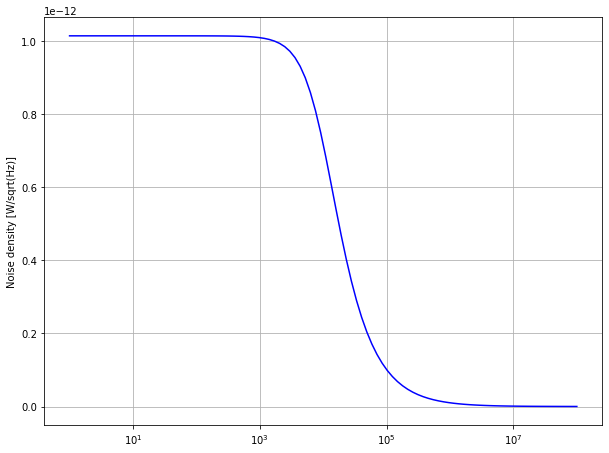

In [24]:

f = np.logspace(0,8, num=100)
A_v = signal.TransferFunction([inn], [tau, 1])
w, mag, phase = A_v.bode(w=f*2*np.pi)               
plot_logxy2(f, 10**(mag/20), 'Frequency [Hz]', 'Noise density [W/sqrt(Hz)]')

In [25]:
f3db=1/2/np.pi/tau
fenb=np.pi/2*f3db
#print(f3db)
#print(fenb)
Pn_rms=np.sqrt(inn**2*fenb)
Ps_rms=0.5*np.sqrt(2)*(10e-6)
#print(Pn_rms)
#print(Ps_rms)
#print(Ps_rms/Pn_rms)
SNR=Ps_rms/Pn_rms
print(SNR)

55631.74013950044


In [26]:
print('The input referred noise in W is', f'{Pn_rms/1e-6:0.5}','uW')
print('The input signal is', f'{Ps_rms/1e-6:0.5}', 'uW')

The input referred noise in W is 0.0001271 uW
The input signal is 7.0711 uW


In [27]:
print('The signal to noise ratio is', f'{SNR:0.5}','W/W','which is',f'{20*np.log10(SNR):0.4}', 'dB')

The signal to noise ratio is 5.5632e+04 W/W which is 94.91 dB


__d)__ Simulate your design in LTspice, using an current source to model $D_1$. Use the *UniversalOpamp2* component provided by LTspice, and assign appropriate values of $V_{os}$ for $U_1$ and $U_2$. In your submission, be sure to include the following:

1) Input-referred *current noise density* (this is just the output noise density divided by the DC gain)

2) Magnitude and phase of the transfer function ($V_{out}/i_d$), indicating the $3dB$ frequency

3) Schematic with DC operating points, showing the DC voltage at all nodes (this should include the effect of offset)

*Solution:*
 
Simulate the design in LTSPice:

The input referred current noise density is shown here where the rms noise current is 53.81pA. Note here the unit of y-axis actually is A. 

<center><img src="img/HW6_d1.png" width=1500></center>

The magnitude and phase response of $\frac{V_{out}}{i_d}$ is shown in the following plot. The DC gain is about 98dB and 3dB bandwidth is 10kHz

<center><img src="img/HW6_d2.png" width=1500></center>

Schematic with DC operating point including offset voltage is shown. The total output offset voltage is -3mV which agrees with our previous analysis. 

<center><img src="img/HW6_d3.png" width=1500></center>

__*Bonus* (1 point)__: The noise performance of this design is typically dominated by the noise from $R_f$. It may seem like reducing the value of $R_f$ and setting $R_2 > R_1$ (keeping the total gain constant) could result in an improvement in noise performance. Show, through analysis, that this is not the case. Use Ltspice to verify.

*Solution:*

That is not true, because the noise of $R_f$ and $R_1$ will be amplified by the second stage (the inverting amplifier) and thus the total output noise will increase. Now let's assume $R_f$ and $R_1$ reduce by N times while the $R_2$ remains unchanged.

Output noise from $R_f$ becomes:
 
 $${e_{n,R_{f}}}^2=4kT\frac{R_{f}}{N}\cdot (\frac{NR_2}{R_{1}(1+sR_{2}C_{1})})^2 \frac{V^2}{Hz}$$

Output noise from $R_1$ is:
 
 $${e_{n,R_{f}}}^2=4kT\frac{R_{1}}{N}\cdot (\frac{NR_2}{R_{1}(1+sR_{2}C_{1})})^2 \frac{V^2}{Hz}$$

Output noise from $R_2$ is:
 
 $${e_{n,R_{f}}}^2=4kT\frac{R_{2}}{N}\cdot (\frac{1}{(1+sR_{2}C_{1})})^2 \frac{V^2}{Hz}$$

From the noise expression, we can find the noise square density from $R_f$ and $R_1$ increases by N times and then we verify it in the simulation. 

In the simulation we choose $N=2$ to verify the analysis. Here is the circuit schematic with DC operating point.

<center><img src="img/HW6_Bonus1.png" width=1500></center>

The input referred current noise density:

<center><img src="img/HW6_Bonus2.png" width=1500></center>

By comparing it with the results in part c, the noise density and rms noise actually increase.